This project aims to extract features from multiple raw audio files

In [1]:
from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *

sounds = [
              "inputs/sounds/flower.wav", 
              "inputs/sounds/3129775.wav", 
              "inputs/sounds/sound1.wav",
              "inputs/sounds/139368801.wav",
              "inputs/sounds/139364551.wav",
              "inputs/sounds/90781157.wav",
         ]

builder = []
for sound in sounds:
    builder.append(SoundLoader(sound=sound,
                         fixed_size=32*32, 
                         sample_size=0.01, 
                         #insert_global_input_state = 4,
                         one_hot = 256,
                         uLaw = 256,
                         amplitude = 0.5,
                         samplerate = 4410,
                         n_steps = 32,
                         ))

loader = SoundCombiner(builder)

print(loader.fixed_size)

network = ConvNet(loader, 
                  training_iters=2000000, 
                  display_step=10, 
                  save_step = 30000,
                  learning_rate = 0.001, 
                  decay_step = 10000000,
                  decay_rate = 0.95,
                  batch_size = loader.batch_size,
                  n_steps = loader.n_steps,
                 )

print(network.n_input)
print(network.n_classes)

x=tf.placeholder(tf.float32, [None, 32, 32], "X")
#x=tf.placeholder("float", [None, 8*8])

gru = GRUOperation(cells=[1024]*3, n_classes=network.n_classes)

layers = []
layers.append(gru)

network.Run(layers, 
            x=x, 
            #restore_path="graphs/MultiAudioGeneration", 
            save_path="graphs/MultiAudioGeneration",
            state = gru.state,
           )


1025
32
256
x: (?, 32, 32)
y: (?, 256)
GRU_0: [1024, 1024, 1024] => (?, 256)


C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Iter 1280, Loss= 7.778898, Accuracy= 0.14844, Lrn Rate= 0.001 cpu: 0.64s, gpu: 0.66s time: 0mins pool: 0
Iter 2560, Loss= 6.185890, Accuracy= 0.00781, Lrn Rate= 0.001 cpu: 0.59s, gpu: 0.73s time: 0mins pool: 0
Iter 3840, Loss= 4.125638, Accuracy= 0.09375, Lrn Rate= 0.001 cpu: 0.74s, gpu: 0.8s time: 0mins pool: 0
Iter 5120, Loss= 6.708685, Accuracy= 0.01562, Lrn Rate= 0.001 cpu: 0.74s, gpu: 0.81s time: 1mins pool: 0
Iter 6400, Loss= 5.648281, Accuracy= 0.00781, Lrn Rate= 0.001 cpu: 0.74s, gpu: 0.78s time: 1mins pool: 0
Iter 7680, Loss= 5.145308, Accuracy= 0.00000, Lrn Rate= 0.001 cpu: 0.59s, gpu: 0.82s time: 1mins pool: 0
Iter 8960, Loss= 3.818499, Accuracy= 0.08594, Lrn Rate= 0.001 cpu: 0.64s, gpu: 0.8s time: 1mins pool: 0
Iter 10240, Loss= 5.737528, Accuracy= 0.02344, Lrn Rate= 0.001 cpu: 0.78s, gpu: 0.81s time: 2mins pool: 0
Iter 11520, Loss= 5.120322, Accuracy= 0.02344, Lrn Rate= 0.001 cpu: 0.63s, gpu: 0.84s time: 2mins pool: 0
Iter 12800, Loss= 5.461625, Accuracy= 0.00781, Lrn Rate

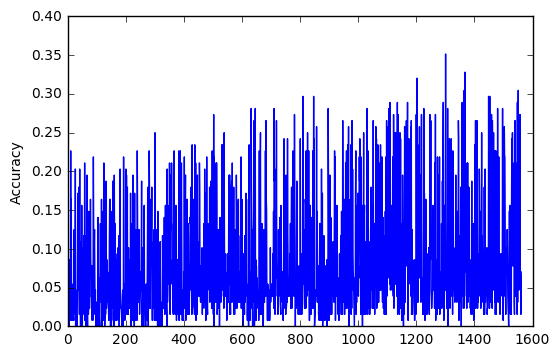

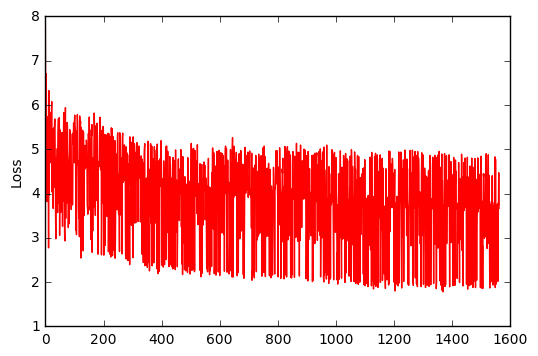

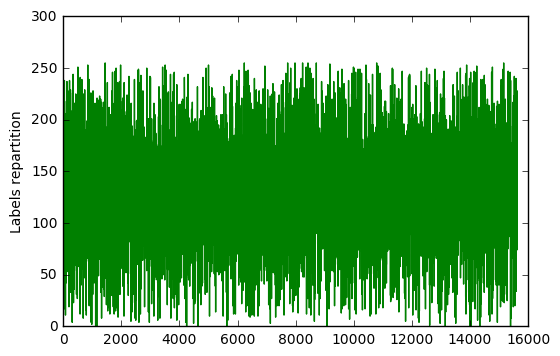

In [2]:
network.Plot()

In [1]:
from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *

loader = SoundLoader(sound="inputs/sounds/139364551.wav",
                     fixed_size=32*32, 
                     sample_size=0.01, 
                     #insert_global_input_state = 4,
                     one_hot = 256,
                     uLaw = 256,
                     samplerate=4410,
                     random=True,
                     amplitude=0.5,
                     )

network = ConvNet(loader, n_steps=32)

x=tf.placeholder("float", [None, 32, 32])

gru = GRUOperation(cells=[1024]*3, n_classes=network.n_classes)

#--------------------------------------------------------------------------------------------
#Layers
layers = []
layers.append(gru)
#End layers
#--------------------------------------------------------------------------------------------

batch = loader.getNextTimeBatch(1, n_steps=network.n_steps)

print(loader.converter.last_sample_position)

prediction = network.Generate(batch[0][0], 
                              "graphs/MultiAudioGeneration", 
                              x = x,
                              layers = layers, 
                              iterations=4410*1, 
                              display_step = 100,
                              epsilon = 0, 
                              state = gru.state
                             )

print(loader.converter.last_sample_position)


0.6865349018412912
GRU_0: [1024, 1024, 1024] => (?, 256)
Model restored from file: None
sample_state: 0
status: 0/4410 [0.484375, 0.4765625, 0.5078125, 0.50390625, 0.4765625, 0.5, 0.51953125, 0.48046875, 0.46484375, 0.515625] 1025
sample_state: 0.0007381381204050918
status: 100/4410 [0.5, 0.49609375, 0.5, 0.49609375, 0.49609375, 0.5, 0.49609375, 0.4921875, 0.49609375, 0.49609375] 1125
sample_state: 0.0014762762408101798
status: 200/4410 [0.49609375, 0.49609375, 0.49609375, 0.5, 0.5, 0.5, 0.5, 0.49609375, 0.5, 0.49609375] 1225
sample_state: 0.0022144143612152643
status: 300/4410 [0.49609375, 0.5, 0.5, 0.49609375, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5] 1325
sample_state: 0.002952552481620349
status: 400/4410 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49609375, 0.5, 0.5] 1425
sample_state: 0.0036906906020254334
status: 500/4410 [0.49609375, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49609375, 0.5] 1525
sample_state: 0.004428828722430518
status: 600/4410 [0.49609375, 0.5, 0.5, 0.5, 0.49609375, 0.49609375, 0.5

In [2]:
from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *
converter = SoundConverter("")
data = converter.TensorToSound(prediction, "outputs/generated2.wav", multiplier=1, offset=0, samplerate=loader.samplerate)

import IPython
IPython.display.Audio("outputs/generated2.wav")

Sound saved as: outputs/generated2.wav


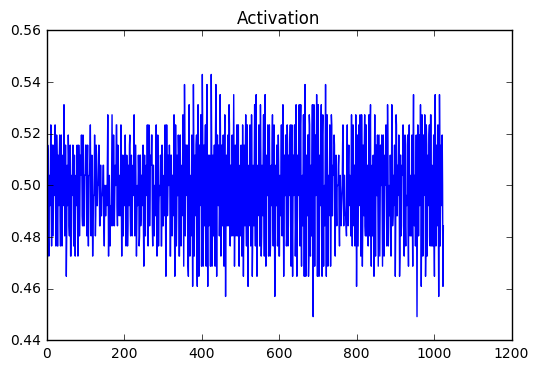

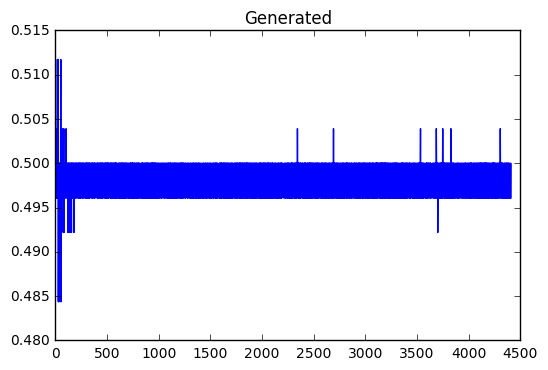

In [3]:
import matplotlib.pyplot as plt
plt.plot(prediction[0:loader.fixed_size])
plt.title("Activation")
plt.show()
plt.plot(prediction[loader.fixed_size:])
plt.title("Generated")
plt.show()